# Assignment #4.
I pledge on my honor that I have not given or received any unauthorized assistance on this assignment/examination. I further pledge that I have not copied any material from a book, article, the Internet or any other source except where I have expressly cited the source.

By filling out the following fields, you are signing this pledge. No assignment will get credit without being pledged.

Name: Beatrice Spinola

CWID: 20012606

Date: 04/21/2023

# Instructions
In this assignment, you should use this Jupyter notebook to answer the questions below. Simply type your code into embedded chunks.

For all the programming homeworks, you should submit a report as a Jupyter notebook organized by questions, with the proper explanation for every answer, and saved as 1). an HTML or pdf file. It might be easier to generate an HTML file than a pdf file. 2). Notebook file with the extension .ipynb. From the file menu of the Jupyter notebook, you can download the PDF or HTML and ipynb files as: File --> Download as:

If you want to improve your homework, you can resubmit it until the deadline.

Total = 20 points

## Question
VIX is the Chicago Board Options Exchange (CBOE) Volatility Index.  VIX indicates the expected volatility of the stock market based on S&P500 index options, so you do not need to make any additional volatility calculations.

You are a volatility trader and would like to classify the "Close" value of the VIX index of future volatility (http://www.cboe.com/vix) in periods of low, middle, and high volatility. 

As you have access to the historical VIX's Close values (file ^Vix.csv), train a Hidden Markov Model (HMM) to obtain three states of the economy (high, medium, and low volatility).  You can use the GaussianHMM function from the hmmlearn (hmmlearn.hmm) Python package.

Instructions to install the package hmmlearn:
-	Open an Anaconda terminal selecting “Run as Administrator” 
-	Submit the following code in this terminal:
conda install -c conda-forge hmmlearn
You can also explore the package and other ways to install this package at:
https://github.com/hmmlearn/hmmlearn

You can also explore the tutorial of hmmlearn and examples at:
https://hmmlearn.readthedocs.io/en/latest/tutorial.html


1).	With the complete dataset of VIX's Close value, create the variable Xp that includes the following periods (you will not use Xp for your model):

0.	Low volatility: observations less or equal than the 15% percentile.
1.	Medium volatility
2.	High volatility: observations greater or equal than the 85% percentile.  (1 point)

In [1]:
pip install --upgrade --user hmmlearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install gitpython

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --user git+https://github.com/hmmlearn/hmmlearn

  Cloning https://github.com/hmmlearn/hmmlearn to c:\users\beasp\appdata\local\temp\pip-req-build-h4y65nu_
Note: you may need to restart the kernel to use updated packages.


  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [4]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from hmmlearn import hmm

# Tells matplotlib to display images inline instead of a new window
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Reading the csv file 
data = pd.read_csv('/Users/beasp/Downloads/^VIX.csv')
data

,date,Open,High,Low,Close
0,2003-01-02,28.74,28.74,25.32,25.39
1,2003-01-03,25.55,25.55,24.68,24.68
2,2003-01-06,25.32,25.42,24.29,24.91
3,2003-01-07,25.13,25.69,24.91,25.13
4,2003-01-08,25.62,25.76,25.07,25.53
...,...,...,...,...,...
4395,2020-06-18,33.83,36.25,32.24,32.94
4396,2020-06-19,32.07,35.12,30.40,35.12
4397,2020-06-22,35.22,35.39,31.64,31.77
4398,2020-06-23,31.71,31.71,29.26,31.37


In [6]:
# Summary statistics of the data
data.describe()

,Open,High,Low,Close
count,4400.000000,4400.000000,4400.000000,4400.000000
mean,18.946605,19.830373,18.068761,18.837527
std,9.144273,9.811489,8.463463,9.105915
min,9.010000,9.310000,8.560000,9.140000
25%,13.230000,13.757500,12.750000,13.150000
50%,16.180000,16.890000,15.470000,16.095000
75%,21.280000,22.335000,20.340000,21.130000
max,82.690000,89.530000,72.760000,82.690000


In [7]:
# Create observations >/= than the 15% percentile, and >/= than the 85% percentile
df = data['Close'].describe(percentiles=[.15,.85])
df

count    4400.000000
mean       18.837527
std         9.105915
min         9.140000
15%        12.240000
50%        16.095000
85%        25.230000
max        82.690000
Name: Close, dtype: float64

In [8]:
# Add Low and High volatilities columns in the dataset
data["15"] = df["15%"]
data["85"]= df["85%"]

In [9]:
# Create a new variable Xp
data["Xp"] = 0
for i in range(0,4400):
    if (data["Close"][i] <= data["15"][i]):
        data["Xp"][i] = 0
    elif (data["Close"][i] >= data["85"][i]):
        data["Xp"][i] = 2
    else:
        data["Xp"][i] = 1
data

,date,Open,High,Low,Close,15,85,Xp
0,2003-01-02,28.74,28.74,25.32,25.39,12.24,25.23,2
1,2003-01-03,25.55,25.55,24.68,24.68,12.24,25.23,1
2,2003-01-06,25.32,25.42,24.29,24.91,12.24,25.23,1
3,2003-01-07,25.13,25.69,24.91,25.13,12.24,25.23,1
4,2003-01-08,25.62,25.76,25.07,25.53,12.24,25.23,2
...,...,...,...,...,...,...,...,...
4395,2020-06-18,33.83,36.25,32.24,32.94,12.24,25.23,2
4396,2020-06-19,32.07,35.12,30.40,35.12,12.24,25.23,2
4397,2020-06-22,35.22,35.39,31.64,31.77,12.24,25.23,2
4398,2020-06-23,31.71,31.71,29.26,31.37,12.24,25.23,2


In [10]:
# Drop the 15 and 85 percentiles column 
data = data.drop(["15","85"], axis = 1)
data

,date,Open,High,Low,Close,Xp
0,2003-01-02,28.74,28.74,25.32,25.39,2
1,2003-01-03,25.55,25.55,24.68,24.68,1
2,2003-01-06,25.32,25.42,24.29,24.91,1
3,2003-01-07,25.13,25.69,24.91,25.13,1
4,2003-01-08,25.62,25.76,25.07,25.53,2
...,...,...,...,...,...,...
4395,2020-06-18,33.83,36.25,32.24,32.94,2
4396,2020-06-19,32.07,35.12,30.40,35.12,2
4397,2020-06-22,35.22,35.39,31.64,31.77,2
4398,2020-06-23,31.71,31.71,29.26,31.37,2


2. Train your HMM only using the "Close" value of the VIX index from 2003 until 2010. Obtain the hidden states for your test sample using the data from 2011 to 2020 (without including Xp)   (6 points)

In [11]:
# Split data into X and Y for train and test sets
X = data.drop(["Open", "High", "Low", "date","Xp"], axis = 1)
Y = data.drop(['Xp',"Open","High","Low","date"], axis = 1)

# Train is up to end of 2010
X = X[0:2015]

# Test is 2011 onward to 2020 end of data
Y = Y[2015:]

In [12]:
X.head()

,Close
0,25.39
1,24.68
2,24.91
3,25.13
4,25.53


In [13]:
X.tail()

,Close
2010,17.67
2011,17.52
2012,17.28
2013,17.52
2014,17.75


In [14]:
# Train HMM only using the VIX index from 2003 until 2010.
remodel = hmm.GaussianHMM(n_components=3, covariance_type="full", n_iter=100)
remodel.fit(X)
A = remodel.predict(X)

#Test sample using the data from 2011 to 2020 
#remodel.fit(Y)
B = remodel.predict(Y)
B

array([1, 0, 0, ..., 2, 2, 2], dtype=int64)

2.a). Calculate the mean and variance of each state   (1 point)

In [15]:
# Calculating the mean and variance of each state
hidden_state_0 = 0
hidden_state_1 = 0
hidden_state_2 = 0

mean_arr = [];
for i in range(remodel.n_components):
    mean_arr.append(remodel.means_[i][0])
    
for i in range(remodel.n_components):
    print("{0}th hidden state".format(i))
    print("mean = ", remodel.means_[i])
    print("var = ", np.diag(remodel.covars_[i]))
    if (remodel.means_[i][0] == max(mean_arr)):
        print('hidden_state = 2')
    elif (remodel.means_[i][0] == min(mean_arr)):
        print('hidden_state = 0')
    else:
        print('hidden_state = 1')
    print()

0th hidden state
mean =  [13.75279723]
var =  [4.68773813]
hidden_state = 0

1th hidden state
mean =  [22.31623256]
var =  [10.30838783]
hidden_state = 1

2th hidden state
mean =  [41.41894593]
var =  [145.99822402]
hidden_state = 2



2.b). Calculate the transition matrix. Indicate what is the probability to transicion from a state of low volatility to medium volatility.   (1 point)

In [16]:
# Transition matrix
print("Transition matrix")
print(remodel.transmat_)

Transition matrix
[[9.92907005e-01 7.09299479e-03 2.95826897e-44]
 [9.64796174e-03 9.85027663e-01 5.32437486e-03]
 [6.60294313e-44 1.52270564e-02 9.84772944e-01]]


Hence the probability to transition from low volatility to medium volatility is 9.849%

2.c).Create a  new variable hidden_states where you assign 2 to the hidden state with the highest mean, 1 the hidden state with the second highest mean, and 0 otherwise.   (1 point)

In [17]:
# Creating a new variable named hidden_states
data["hidden_states"] = A.tolist()+B.tolist()
display(data)

,date,Open,High,Low,Close,Xp,hidden_states
0,2003-01-02,28.74,28.74,25.32,25.39,2,1
1,2003-01-03,25.55,25.55,24.68,24.68,1,1
2,2003-01-06,25.32,25.42,24.29,24.91,1,1
3,2003-01-07,25.13,25.69,24.91,25.13,1,1
4,2003-01-08,25.62,25.76,25.07,25.53,2,1
...,...,...,...,...,...,...,...
4395,2020-06-18,33.83,36.25,32.24,32.94,2,2
4396,2020-06-19,32.07,35.12,30.40,35.12,2,2
4397,2020-06-22,35.22,35.39,31.64,31.77,2,2
4398,2020-06-23,31.71,31.71,29.26,31.37,2,2


2.d). Calculate the frequency table or confusion matrix comparing your hidden states with the variable Xp.   (1 point)

In [18]:
# Frequency table for the comparision of hidden states with the variable Xp
pd.crosstab(data.hidden_states, data.Xp)

Xp,0,1,2
hidden_states,,,
0,664,1949,0
1,0,1125,225
2,0,1,436


In [19]:
# Creating a confusion matrix for the comparision of hidden states with the variable Xp
from sklearn.metrics import confusion_matrix

CM = pd.DataFrame(confusion_matrix(data.Xp, data.hidden_states).T, 
                  index = ['0', '1', '2'], 
                  columns = ['0', '1', '2'])
CM

,0,1,2
0,664,1949,0
1,0,1125,225
2,0,1,436


2.e). Calculate accuracy and the Matthews correlation coefficient (sklearn.metrics.matthews_corrcoef) comparing the hidden states with Xp. Discuss your results   (2 points)

In [20]:
#Calculating the accuracy and the Matthews correlation coefficient comparing the hidden states with Xp
from sklearn.metrics import matthews_corrcoef,accuracy_score

XpRealTest = data.drop(["Open","High","Low","date","Close"], axis =1)
XpRealTest = XpRealTest[2015:]
XpRealTest

,Xp,hidden_states
2015,1,1
2016,1,0
2017,1,0
2018,1,0
2019,1,0
...,...,...
4395,2,2
4396,2,2
4397,2,2
4398,2,2


In [21]:
known_states_test = XpRealTest['Xp'].to_numpy()
known_states_test

array([1, 1, 1, ..., 2, 2, 2], dtype=int64)

In [22]:
B

array([1, 0, 0, ..., 2, 2, 2], dtype=int64)

In [23]:
matthews_corrcoef(known_states_test, B)

0.33288559922684885

The Matthews correlation coefficient is used in machine learning as a measure of the quality of binary and multiclass classifications. The Matthews correlation coefficient for our data is around 0.333 which is considered to be a decent prediction.

In [24]:
accuracy_score(known_states_test,B)

0.4348008385744235

The accuracy for comparing the hidden states with Xp is 0.4360587002096436

2.f). Plot VIX for the entire period of analysis and the period from 2011 to 2020. You can use pyplot from the Python matplotlib to generate your graphs. (4 points)

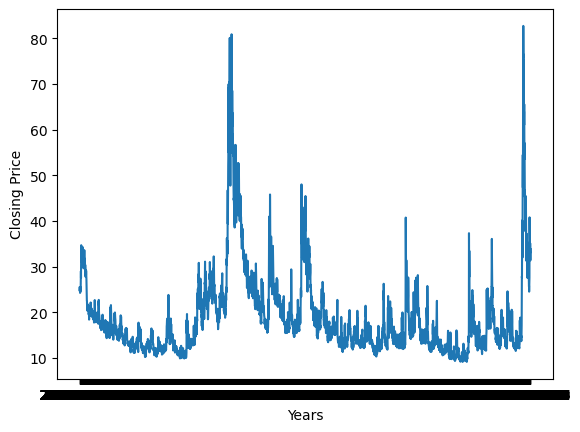

In [25]:
# Plot a graph over entire period
plt.plot(data["date"], data["Close"])
plt.xlabel('Years')
plt.ylabel('Closing Price')
plt.show()

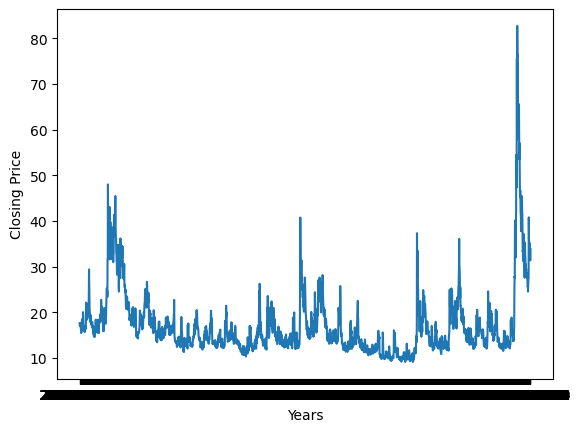

In [26]:
# Plot a graph over the period from 2011 to 2020
A = data.drop(['Xp',"Open","High","hidden_states"], axis = 1)
A = A[2015:]
A

plt.plot(A["date"], A["Close"])
plt.xlabel('Years')
plt.ylabel('Closing Price')
plt.show()

3). Discuss the results obtained in the previous question, and review if the periods of high or low volatility detected by your HMM explain any significant changes of the economy (i.e., credit crisis, COVID crisis …) (3 points)

We can see that the high is around 80 between 2008 and 2020. This is because of the financial crisis in 2008, when volatility peaked. Because to the COVID issue, volatility hit a new high in 2020. Most years, it was between 10 and 20. There were few cases where it varied between 30 and 40. This tendency is seen in the first graph, which spans the years 2011-2012. This happened during The Great Recession, which occurred following the 2008 financial crisis. The Russian financial crisis caused a minor recession in 2014, with the average price of a barrel falling by over 40%. The graph shows a similar movement when it increased to 50. As a result, we can see that when the market is disrupted and under stress, volatility rises. The lesser the uncertainty in market, the volatility remains low or stable.